# TP2 Page 48 a 69

#### Groupe 7 
    ####-NJONOU GABY 19M2347
    #### -MOUASSOM FERNAND 12W0902
    #### -FONE SIMO MERLIN 19M2382
    #### -EVINA KENNE RANDY  19M2456

In [ ]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from sklearn.datasets import make_blobs


# 1.     CREATION D'UN DATASET AVEC NUMPY ET PANDAS

In [ ]:
# On veut cree un dataset Meteorologique Artificille de quelques villes du cameroun en utilisant pandas et Numpy

#On cree un tableau pour les diffferentes villes

cities = ['Yaounde ', 'Douala', 'Baffoussam','Bagante', 'Ngaoundere', 'Maroua','Garoua', 'Edea', 
          'Bamenda','Buea', 'Ebolowa', 'Yagoua']

#nombre de villes
n= len(cities)

#pour temperature ,humidite et vent on genre de valeurs aleatoires suivant une loi normale
data = {
            'Temperature': np.random.normal(35, 5, n),
            'Humidite': np.random.normal(75, 3.5, n),
            'Vent': np.random.normal(19, 4.5, n),
            'Pression_at': np.random.normal(1000, 50, n)
        }

# on charge tout dans un dataframe et on affiche
df = pd.DataFrame(data=data, index=cities)
df

,Temperature,Humidite,Vent,Pression_at
Yaounde,33.441455,75.893728,15.102078,1110.688541
Douala,41.050835,77.247711,13.817832,1056.026906
Baffoussam,33.087710,75.672414,17.551965,1000.639901
Bagante,29.782506,76.469899,14.834619,987.017113
Ngaoundere,35.585703,71.573468,24.522549,1026.021023
Maroua,33.914229,76.968249,29.618415,991.735471
Garoua,32.761275,71.543564,18.935453,984.345082
Edea,35.137005,77.691383,13.183632,1089.114986
Bamenda,40.183644,72.474885,30.104654,954.425891
Buea,35.097417,71.839700,21.617881,998.457552


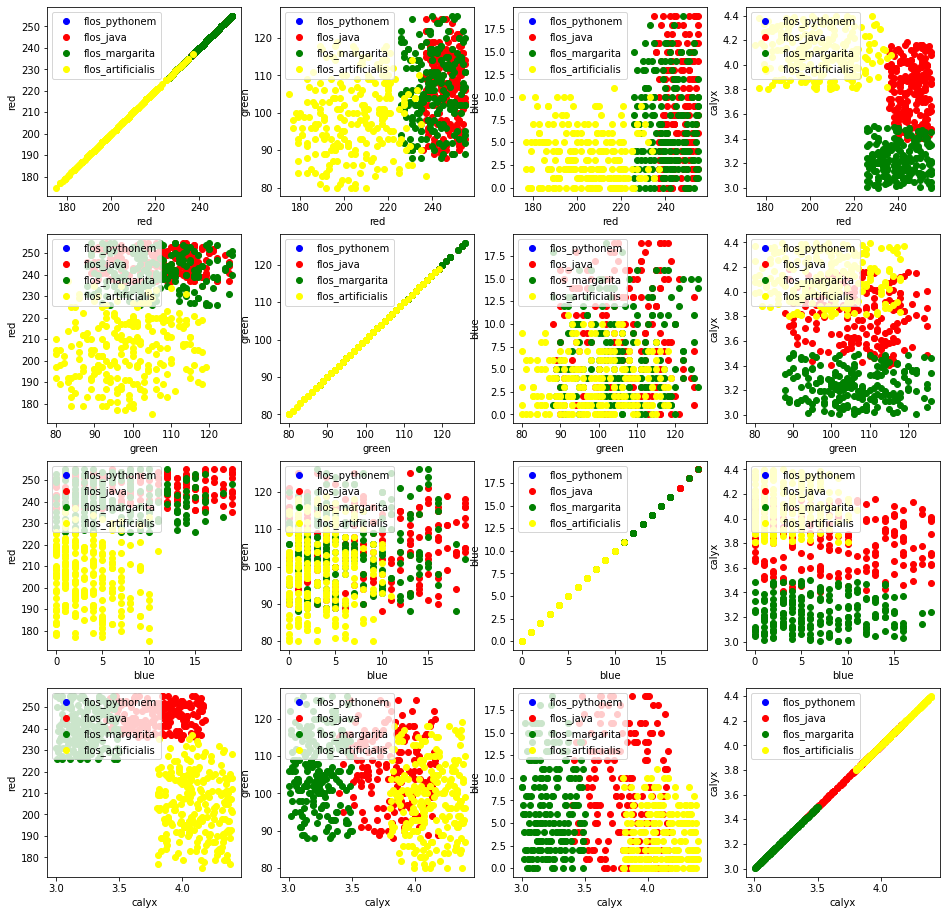

In [ ]:
# On souhaite cree un dataset pour des fleurs qui ne sont pas repertorier


def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
    return truncnorm(
(low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)
def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)
# numbre d'elements pour chaque classe de fleur:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}

# flos Pythonem:

number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data

# flos Java:

number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data

# flos Java:

number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data

# flos artificialis:

number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,
num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,
num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data
data = np.concatenate((flowers["flos_pythonem"],
                       flowers["flos_java"],
                       flowers["flos_margarita"],
                       flowers["flos_artificialis"]
                    ), axis=0)

# assigning the labels

target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num
conc_data = np.concatenate((data, target.reshape(target.shape[0],
1)),
axis=1)
np.savetxt("strange_flowers.txt", conc_data, fmt="%2.2f",)
import matplotlib.pyplot as plt
target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green', 'yellow']
for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target==color_ind, x],
                             data[target==color_ind, y],
                             label=target_names[color_ind],
                             c=colors[color_ind])
        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')

# 2.GENERATE DATASET WITH SCIKIT-LEARN


In [ ]:
#On genere un dataset de 1000 donee avec scikit-learn  avec make_blobs 

data, labels = make_blobs(n_samples=1000,centers=np.array([[4, 3], [7, 5], [12,9]]),random_state=1)
labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("test.csv", all_data)
all_data[:10]

array([[ 3.72415394,  4.22895559,  0.        ],
       [ 7.16466507,  5.77817418,  1.        ],
       [ 7.51441156,  4.98274913,  1.        ],
       [ 3.49102772,  2.83351405,  0.        ],
       [11.0386362 ,  7.57298437,  2.        ],
       [10.61044976,  9.83428321,  2.        ],
       [10.69202866, 10.47239631,  2.        ],
       [11.14017298,  8.56209179,  2.        ],
       [ 5.97620068,  5.56776474,  1.        ],
       [13.27980017,  8.54824406,  2.        ]])

In [ ]:
# illustration de la concatenation et du redimenionement des vesteurs numpy
a = np.array( [[1, 2], [3, 4]])
b = np.array( [5, 6])
b = b.reshape((b.shape[0], 1))
print(b)
x = np.concatenate( (a, b), axis=1)
x


[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

# 3.Lectute des donnees et ajout des etiquettes sur les donees non etiquete


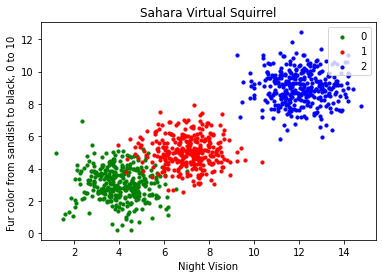

In [ ]:

file_data = np.loadtxt("test.csv")

data = file_data[:,:-1]
labels = file_data[:,2:]

labels = labels.reshape((labels.shape[0]))

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class,1],c=colours[n_class], s=10, label=str(n_class))
ax.set(xlabel='Night Vision',
ylabel='Fur color from sandish to black, 0 to 10 ',
title='Sahara Virtual Squirrel')
ax.legend(loc='upper right')
 

In [ ]:
#On entraine un algorithme de knn sur notre dataset
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data,
labels,
train_size=0.8,
test_size=0.2,
random_state=42 # garantees same output for every run
)
train_data, test_data, train_labels, test_labels = data_sets
# import model
from sklearn.neighbors import KNeighborsClassifier
# create classifier
knn = KNeighborsClassifier(n_neighbors=8)
# train
knn.fit(train_data, train_labels)
# test on test data:
calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 2., 0., 1., 1., 1., 0., 1., 2., 0., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       1., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 1., 0.,
       1., 2., 1., 2., 0., 1., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [ ]:
# On calcule la precision
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))

Accuracy: 0.995


# 4.AUTRES DISTRIBUTIONS 


In [ ]:
import numpy as np
import sklearn.datasets as ds
data, labels = ds.make_moons(n_samples=150,
shuffle=True,
noise=0.19,
random_state=None)
data += np.array(-np.ndarray.min(data[:,0]),
-np.ndarray.min(data[:,1]))
np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])


(0.0, 0.6282023517314066)

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'Moons')]

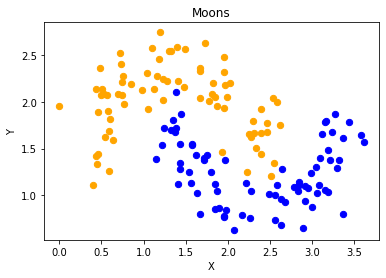

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
c='blue', s=40, label='blues')
ax.set(xlabel='X',
ylabel='Y',
title='Moons')
#ax.legend(loc='upper right');